In [1]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame

In [3]:
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
med_df = pd.read_csv('kyphosis.csv')

In [5]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
med_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
med_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


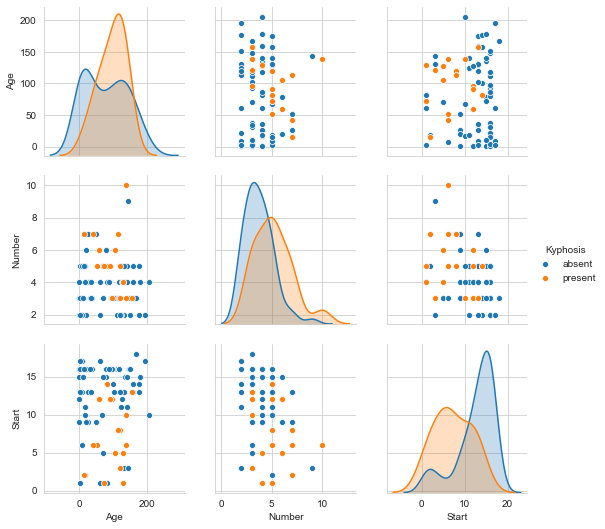

In [18]:
sns.pairplot(med_df,hue = 'Kyphosis')

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
X = med_df.drop('Kyphosis',axis = 1)
y = med_df['Kyphosis']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)

In [54]:
from sklearn.tree import DecisionTreeClassifier 

In [55]:
cf = DecisionTreeClassifier()

In [56]:
cf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
predict = cf.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

      absent       0.87      0.77      0.82        26
     present       0.40      0.57      0.47         7

    accuracy                           0.73        33
   macro avg       0.63      0.67      0.64        33
weighted avg       0.77      0.73      0.74        33

[[20  6]
 [ 3  4]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(n_estimators=300)

In [106]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
pred = rfc.predict(X_test)

In [109]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

      absent       0.85      0.88      0.87        26
     present       0.50      0.43      0.46         7

    accuracy                           0.79        33
   macro avg       0.68      0.66      0.66        33
weighted avg       0.78      0.79      0.78        33

[[23  3]
 [ 4  3]]
